### Objective:

#### The purpose of this project is to determine the best model that predicts fruit prices.

### Loading the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import scipy

### Loading the dataset

In [2]:
df = pd.read_csv("D:\Data Projects\Practice Files\Time Seris Price Vegetables\kalimati_tarkari_dataset.csv")

### Exploring the dataset

In [3]:
# checking for the shape of the dataset

df.shape

(197161, 7)

In [4]:
# checking for information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


### Cleaning the dataset

In [5]:
# checking for null values

df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [6]:
# checking for any duplicates
    
df.duplicated().sum()

0

In [7]:
# dropping unrequired columns

df1 = df.drop(columns= ["SN"])

### Visualizing the Dataset

#### Commodity with the highest price.

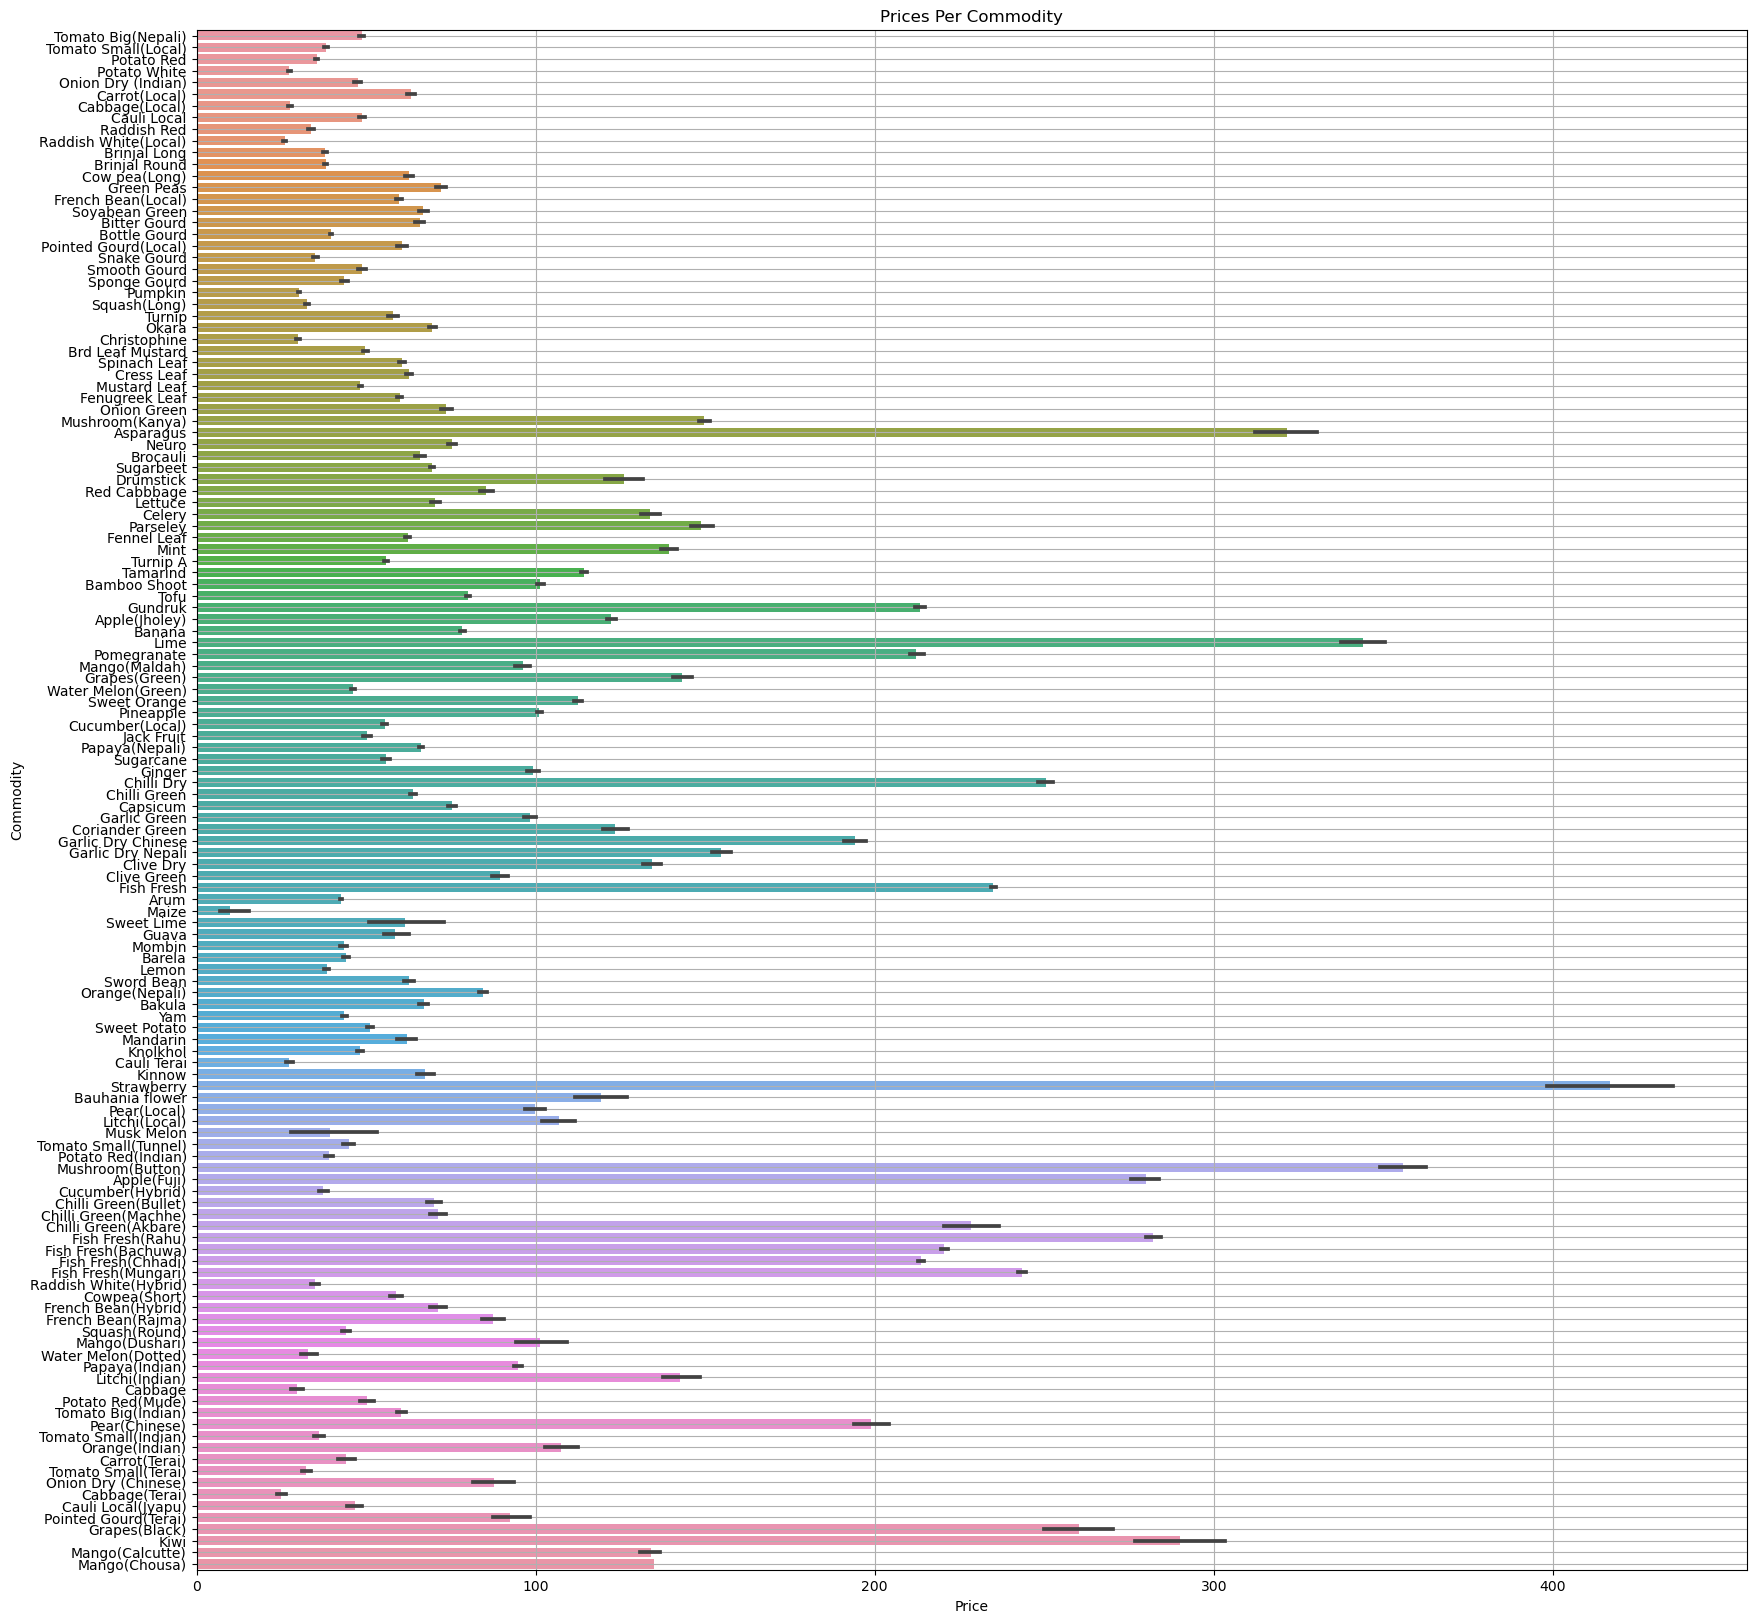

In [8]:
plt.figure(figsize= (20,20))
sns.barplot(y = "Commodity", x = "Average", data = df1)
plt.ylabel("Commodity")
plt.xlabel("Price")
plt.grid()
plt.title("Prices Per Commodity")
plt.show()

#### Checking the average pricing distribution

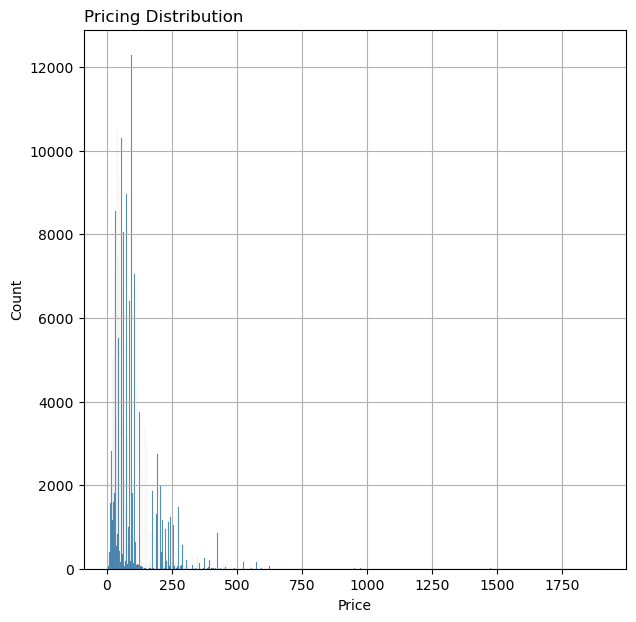

In [9]:
plt.figure(figsize=(7,7))
sns.histplot(df1, x = "Average")
plt.xlabel("Price")
plt.grid(True)
plt.title("Pricing Distribution", loc="left")
plt.show()

#### Checking for the correlation between variables

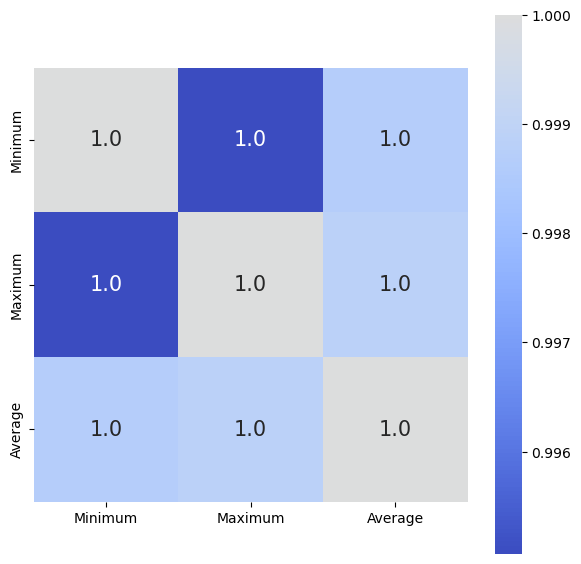

In [10]:
df2 = df1.drop(columns = ["Commodity","Date", "Unit"])

correlation = df2.corr()

plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={"size":15}, fmt=".1f", square=True, center=True, cmap="coolwarm")
plt.show()

### Prdicting the Price

C:\Users\Amos\AppData\Local\Temp\ipykernel_2684\1515118583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Average"])


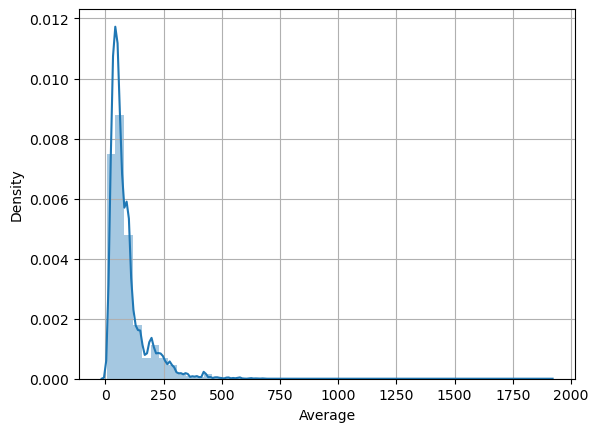

In [11]:
# checking for the distribution of the avergae price column

sns.distplot(df2["Average"])
plt.grid()
plt.show()

#### 1. Random Forest Regressor

In [12]:
# dividing the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = df2.drop(["Average"], axis = 1)
y = df2["Average"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
# Importing the random forst regressor

from sklearn.ensemble import RandomForestRegressor

In [14]:
# defining the regressor

rc = RandomForestRegressor()

In [15]:
## fitting the model 

rc.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# predicting the model

pred_rc = rc.predict(X_train)
pred_rc

array([110. ,  47.5,  45. , ...,  55. ,  45. ,  47.5])

In [17]:
# Regression metrics

from sklearn.metrics import r2_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

In [18]:
# Regressor evaluation scores

print("R^2:" , r2_score(y_train, pred_rc))
print("Homogeneity Score:", homogeneity_score(y_train, pred_rc))
print("MAE:", mean_absolute_error(y_train, pred_rc))
print("MSE:", mean_squared_error(y_train, pred_rc))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred_rc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred_rc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9999624287197061
Homogeneity Score: 0.9999999999999998
MAE: 0.0048471509723792125
MSE: 0.23848934820885137
RMSE 0.4883537121890765
Adjusted R^2: 1.0000751425605878


C:\Users\Amos\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


### 2. XGBoost Regressor

In [19]:
## importing the regressor

from xgboost import XGBRegressor

## defining the regressor

xgr = XGBRegressor()

In [20]:
## fitting the model

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
## predicting the model

xgr_pred = xgr.predict(X_train)
xgr_pred

array([110.015274,  47.502342,  45.001137, ...,  54.994915,  45.001137,
        47.502342], dtype=float32)

In [22]:
## Checking for the evaluation metrics

print("R^2:" , r2_score(y_train, xgr_pred))
print("Homogeneity Score:", homogeneity_score(y_train, xgr_pred))
print("MAE:", mean_absolute_error(y_train, xgr_pred))
print("MSE:", mean_squared_error(y_train, xgr_pred))
print("RMSE", np.sqrt(mean_squared_error(y_train, xgr_pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, xgr_pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.9999990366605775
Homogeneity Score: 0.9994321102338355
MAE: 0.017671073194455746
MSE: 0.0061149417635294285
RMSE 0.07819809309394589
Adjusted R^2: 1.000001926678845


C:\Users\Amos\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [23]:
## checking if the model is overfitting

y_test_pred_xgr = xgr.predict(X_test)

print("R^2:" , r2_score(y_test, y_test_pred_xgr))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred_xgr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_xgr))
print("MSE:", mean_squared_error(y_test, y_test_pred_xgr))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred_xgr)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred_xgr)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 0.9999700080472941
Homogeneity Score: 0.9993098814206046
MAE: 0.02343173455030336
MSE: 0.18952159832244303
RMSE 0.43534078412485433
Adjusted R^2: 1.0000599839054118


C:\Users\Amos\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### The evaluation scores slightly differ from the testing data, despite the accuracy of 99% in both.

### 3. Linear Regression

In [24]:
## loading the required functions for testing 

from sklearn.linear_model import LinearRegression

In [25]:
## loading the linear regression model

lr = LinearRegression()

In [27]:
## fiting the model with the training data

lr.fit(X_train,y_train)

LinearRegression()

In [28]:
## printing the intercepts

print(lr.intercept_)

1.1937117960769683e-12


In [29]:
## printing the coefficients

coefficients = pd.DataFrame(lr.coef_, X_train.columns).T
coefficients = coefficients.rename({0: "Coefficients"})
coefficients

,Minimum,Maximum
Coefficients,0.5,0.5


In [30]:
## predicting the model

pred = lr.predict(X_train)
pred

array([110. ,  47.5,  45. , ...,  55. ,  45. ,  47.5])

In [32]:
## Linear Regression metrics

print("R^2:" , r2_score(y_train, pred))
print("Homogeneity Score:", homogeneity_score(y_train, pred))
print("MAE:", mean_absolute_error(y_train, pred))
print("MSE:", mean_squared_error(y_train, pred))
print("RMSE", np.sqrt(mean_squared_error(y_train, pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_train, pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 1.0
Homogeneity Score: 1.0
MAE: 7.459232393184377e-13
MSE: 1.19973196827183e-24
RMSE 1.0953227689917845e-12
Adjusted R^2: 1.0


C:\Users\Amos\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [33]:
## Checking if the model is overfitting 

y_test_pred = lr.predict(X_test)

In [35]:
## model evaluation for overfitting data

print("R^2:" , r2_score(y_test, y_test_pred))
print("Homogeneity Score:", homogeneity_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test - 1) / len(y_test) - X_test.shape[1]-1))

R^2: 1.0
Homogeneity Score: 1.0000000000000002
MAE: 7.495197570020987e-13
MSE: 1.1970050312515896e-24
RMSE 1.0940772510438144e-12
Adjusted R^2: 1.0


C:\Users\Amos\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### Despite the actual and testing model scored differingm the model has an accuracy of 100%.

### Conclusion: 
    The Linear Regression best predicts the fruit prices.